In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import warnings

In [2]:
passengers = pd.read_excel("Airlines+Data.xlsx")

In [3]:
passengers.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


Converting the 'Month' column into proper date time format

In [4]:
dates = pd.date_range(start='1949-01-01', freq='MS',periods=len(passengers))

In [5]:
dates

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01', '1949-11-01', '1949-12-01',
               '1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01', '1950-11-01', '1950-12-01',
               '1951-01-01', '1951-02-01', '1951-03-01', '1951-04-01',
               '1951-05-01', '1951-06-01', '1951-07-01', '1951-08-01',
               '1951-09-01', '1951-10-01', '1951-11-01', '1951-12-01',
               '1952-01-01', '1952-02-01', '1952-03-01', '1952-04-01',
               '1952-05-01', '1952-06-01', '1952-07-01', '1952-08-01',
               '1952-09-01', '1952-10-01', '1952-11-01', '1952-12-01',
               '1953-01-01', '1953-02-01', '1953-03-01', '1953-04-01',
               '1953-05-01', '1953-06-01', '1953-07-01', '1953-08-01',
      

In [6]:
passengers['Month'] = dates.month
passengers['Year'] = dates.year

In [7]:
passengers.head()

,Month,Passengers,Year
0,1,112,1949
1,2,118,1949
2,3,132,1949
3,4,129,1949
4,5,121,1949


In [8]:
passengers.dtypes

Month         int64
Passengers    int64
Year          int64
dtype: object

In [9]:
passengers.head()

,Month,Passengers,Year
0,1,112,1949
1,2,118,1949
2,3,132,1949
3,4,129,1949
4,5,121,1949


In [10]:
import calendar
passengers['Month'] = passengers['Month'].apply(lambda x: calendar.month_abbr[x])
passengers.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
passengers = passengers[['Month','Year','Passengers']]

In [11]:
passengers.head()

,Month,Year,Passengers
0,Jan,1949,112
1,Feb,1949,118
2,Mar,1949,132
3,Apr,1949,129
4,May,1949,121


In [12]:
passengers['Date'] = dates
passengers.set_index('Date',inplace=True)

In [13]:
passengers.head()

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121


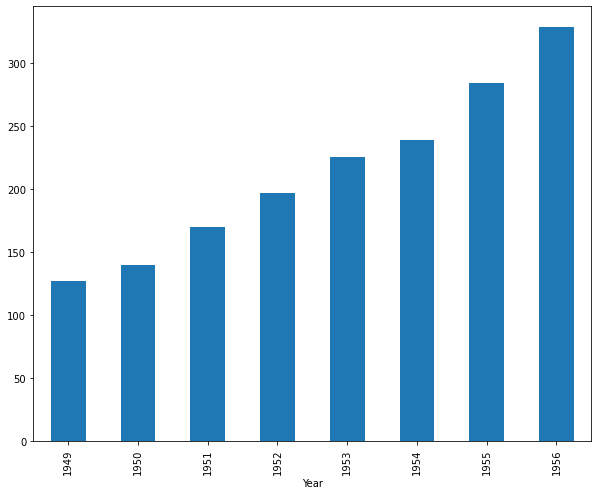

In [14]:
plt.figure(figsize=(10,8))
passengers.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()

In [15]:
print('From the above figure we can see that passengers are increasing with the increase in the year')

From the above figure we can see that passengers are increasing with the increase in the year


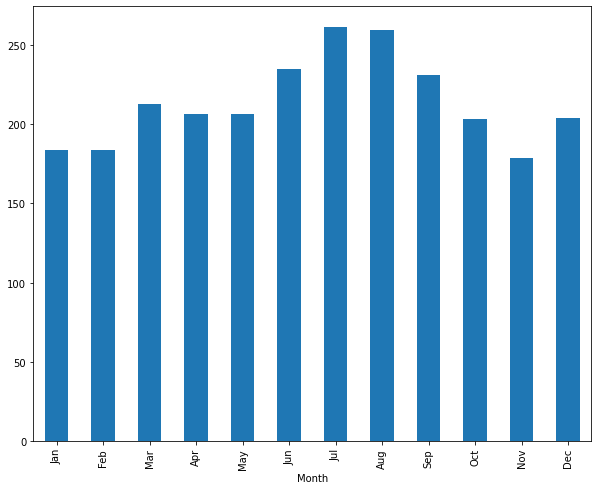

In [16]:
plt.figure(figsize=(10,8))
passengers.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

In [17]:
print('From the above figure we can see that more passengers can be seen between months June to September.')

From the above figure we can see that more passengers can be seen between months June to September.


Lets plot the data to see the trend and seasonality

In [18]:
passengers_count = passengers['Passengers']

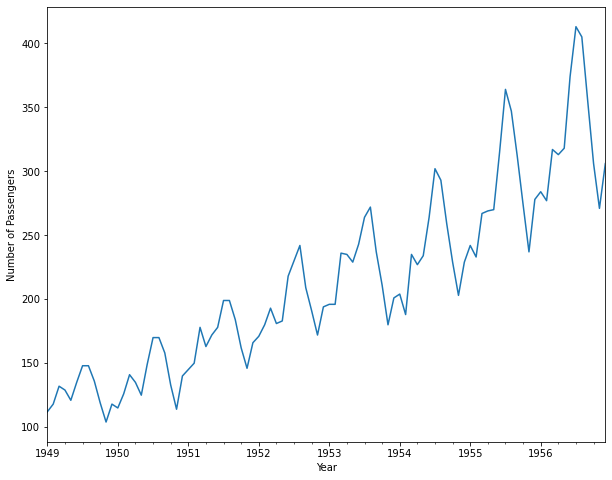

In [19]:
plt.figure(figsize=(10,8))
passengers_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

Now we start with time series decomposition of this data to understand underlying patterns such as trend, seasonality, cycle and irregular remainder

In [20]:
decompose = sm.tsa.seasonal_decompose(passengers_count,model='multiplicative',extrapolate_trend=8)

Text(0.5, 0.98, 'Decomposition of Time Series')

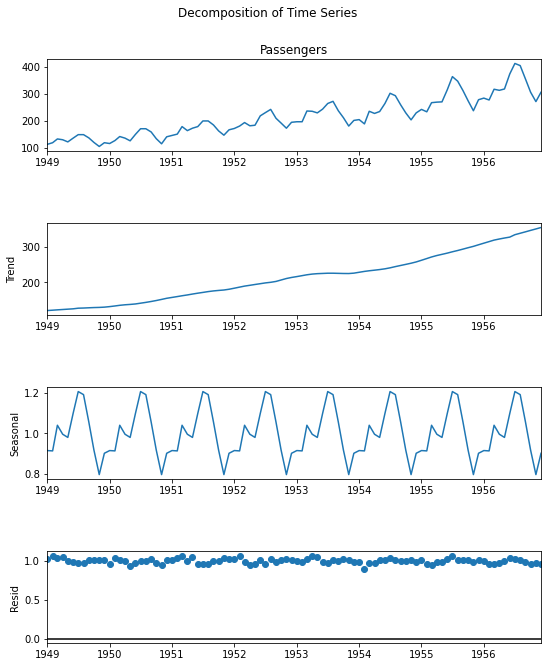

In [21]:
fig = decompose.plot()
fig.set_figheight(10)
fig.set_figwidth(8)
fig.suptitle('Decomposition of Time Series')

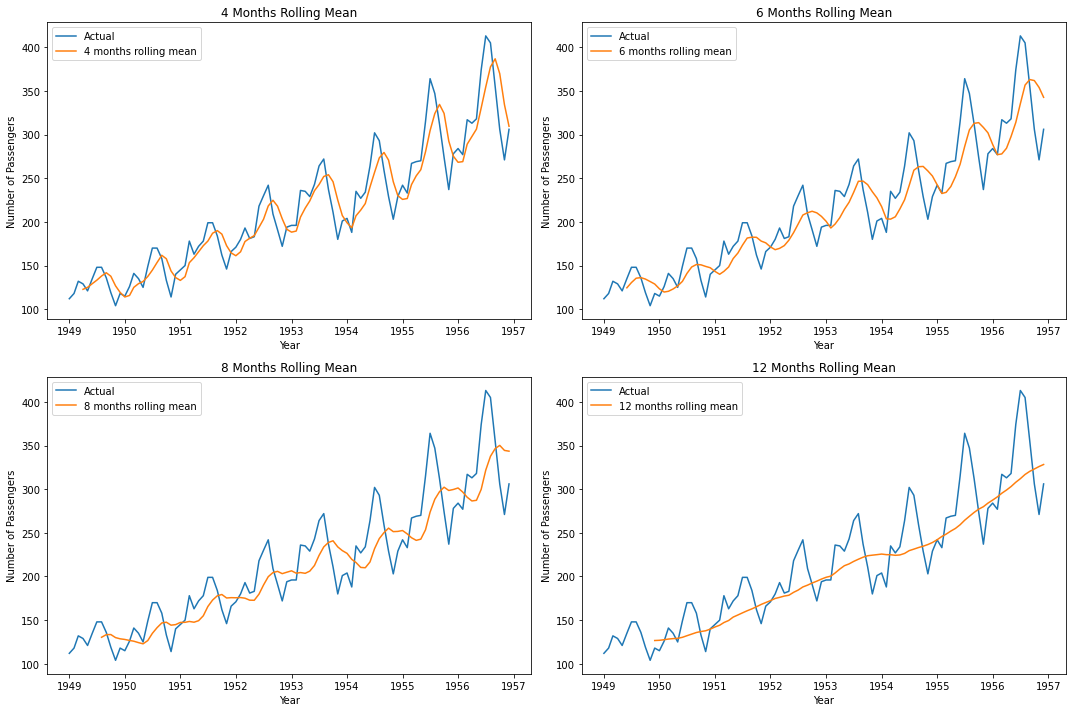

In [22]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(passengers.index,passengers_count,label='Actual')
axes[0][0].plot(passengers.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(passengers.index,passengers_count,label='Actual')
axes[0][1].plot(passengers.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(passengers.index,passengers_count,label='Actual')
axes[1][0].plot(passengers.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(passengers.index,passengers_count,label='Actual')
axes[1][1].plot(passengers.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

As we could see in the above plots, 12-month moving average could produce a wrinkle free curve as desired. This on some level is expected since we are using month-wise data for our analysis and there is expected monthly-seasonal effect in our data.

Seasonality
Let us see how many passengers travelled in flights on a month on month basis. We will plot a stacked annual plot to observe seasonality in our data.

In [23]:
passengers.head()

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121


In [24]:
monthly = pd.pivot_table(data=passengers,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [25]:
monthly

Year,1949,1950,1951,1952,1953,1954,1955,1956
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


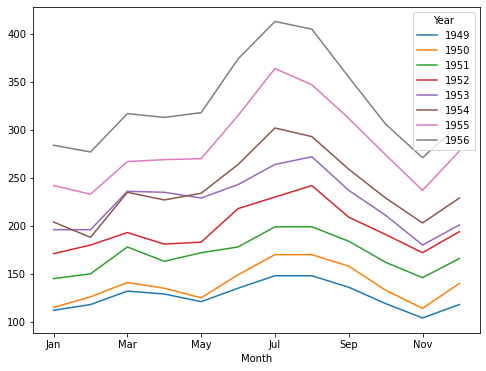

In [26]:
monthly.plot(figsize=(8,6))
plt.show()

In [27]:
yearly = pd.pivot_table(data=passengers,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306


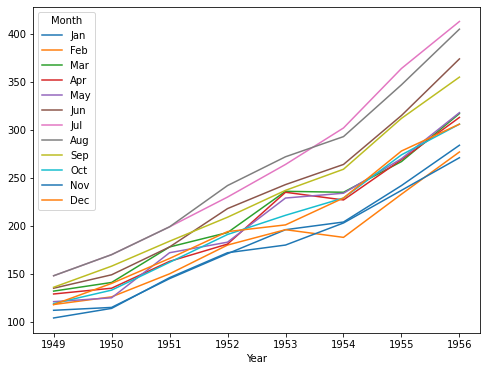

In [28]:
yearly.plot(figsize=(8,6))
plt.show()

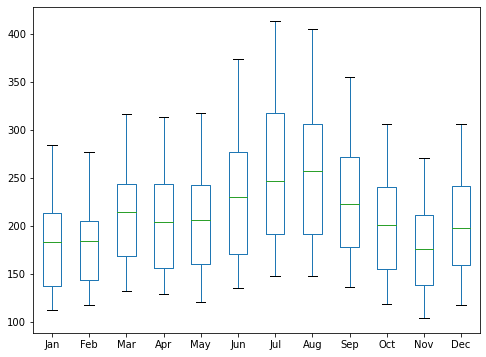

In [29]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

Important Inferences
The passengers are increasing without fail every year.

July and August are the peak months for passengers.

We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

ARIMA Modelling
Dickey-Fuller Test

In [30]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_count)

(1.3402479596467036,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [31]:
adfuller_results = pd.Series(adfuller(passengers_count)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_count)[4].items():
    adfuller_results['Critical Value'+' '+ key] = value
print(adfuller_results)

T stats                    1.340248
p-value                    0.996825
lags used                 12.000000
Number of observations    83.000000
Critical Value 1%         -3.511712
Critical Value 5%         -2.897048
Critical Value 10%        -2.585713
dtype: float64


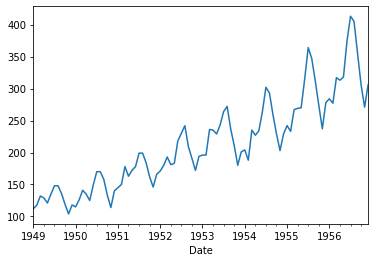

In [32]:
passengers_count.plot()
plt.show()

Let's do log transformation to convert the TS to stationary TS

In [33]:
passengers_log = np.log10(passengers_count)

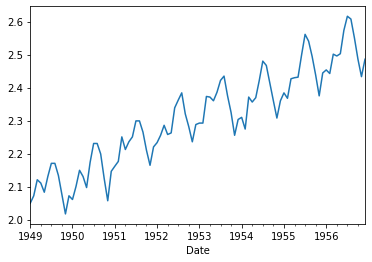

In [34]:
passengers_log.plot()
plt.show()

In [35]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(passengers_log)
adfuller_results = pd.Series(adfuller(passengers_log)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_log)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -0.723027
p-value                    0.840695
lags used                 12.000000
Number of observations    83.000000
Critical Value (1%)       -3.511712
Critical Value (5%)       -2.897048
Critical Value (10%)      -2.585713
dtype: float64


In [36]:
diff1 = passengers_count.diff(1)
diff1.head()

Date
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: Passengers, dtype: float64

In [37]:
diff1.dropna(axis=0,inplace=True)

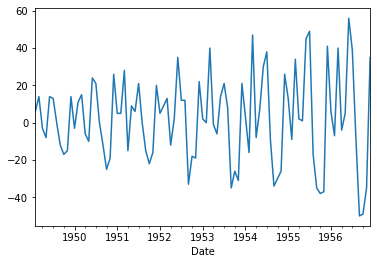

In [38]:
diff1.plot()
plt.show()

In [39]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(diff1)
adfuller_results = pd.Series(adfuller(diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.150002
p-value                    0.224889
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64



The p-value is still greater than 0.05 (Coinfidence Interval 95%).
The differencing by 1 has made mean stationary but variance is changing.
Let's try differencing by 1 on the log transformation

In [40]:
log_diff1 = passengers_log.diff(1)
log_diff1.head()

Date
1949-01-01         NaN
1949-02-01    0.022664
1949-03-01    0.048692
1949-04-01   -0.009984
1949-05-01   -0.027804
Name: Passengers, dtype: float64

In [41]:
log_diff1.dropna(axis=0,inplace=True)

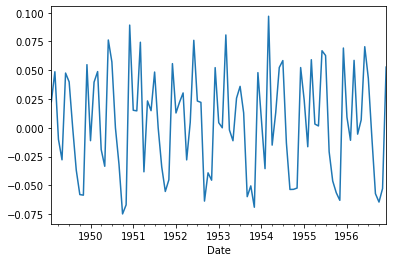

In [42]:
log_diff1.plot()
plt.show()

In [43]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff1)
adfuller_results = pd.Series(adfuller(log_diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.670823
p-value                    0.079225
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [44]:
#p-value is still greateer than 0.05.

In [45]:
log_diff2 = passengers_log.diff(2)
log_diff2.head()

Date
1949-01-01         NaN
1949-02-01         NaN
1949-03-01    0.071356
1949-04-01    0.038708
1949-05-01   -0.037789
Name: Passengers, dtype: float64

In [46]:
log_diff2.dropna(axis=0,inplace=True)

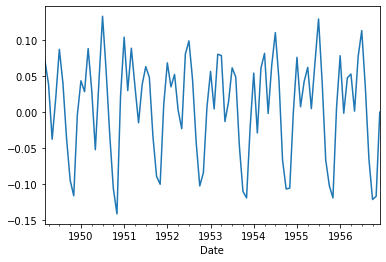

In [47]:
log_diff2.plot()
plt.show()

In [48]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
adfuller(log_diff2)
adfuller_results = pd.Series(adfuller(log_diff2)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff2)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.787629
p-value                    0.060063
lags used                 11.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


p-value is less than 0.05. In this case we reject null hypothesis that TS is non stationary.

Iterate the process to find the best values for p, d, q and P, D, Q

In [49]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0,1)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [50]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [51]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,3)
P = Q = range(0, 3) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [52]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [ ]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
       
        try:
            temp_model = sm.tsa.statespace.SARIMAX(log_diff2,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

           # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 model - AIC:-401.1385277663832
The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.

Predict sales on in-sample date using the best fit ARIMA model
The next step is to predict passengers for in-sample data and find out how close is the model prediction on the in-sample data to the actual truth.

In [54]:
sarima = sm.tsa.statespace.SARIMAX(log_diff2,order=(1,0,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)

In [55]:
sarima_results = sarima.fit()
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                   94
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 205.571
Date:                            Tue, 07 Sep 2021   AIC                           -401.141
Time:                                    18:50:50   BIC                           -389.231
Sample:                                03-01-1949   HQIC                          -396.366
                                     - 12-01-1956                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3151      0.118     -2.673      0.008      -0.546      -0.084
ma.L1          1.0000    266.954   

In [56]:
passengers_count.tail(15)

Date
1955-10-01    274
1955-11-01    237
1955-12-01    278
1956-01-01    284
1956-02-01    277
1956-03-01    317
1956-04-01    313
1956-05-01    318
1956-06-01    374
1956-07-01    413
1956-08-01    405
1956-09-01    355
1956-10-01    306
1956-11-01    271
1956-12-01    306
Name: Passengers, dtype: int64

In [57]:
prediction = sarima_results.get_prediction(start=pd.to_datetime('1960-01-01'),full_results=True)

In [58]:
prediction.predicted_mean

1960-01-01    0.069694
Freq: MS, dtype: float64

In [59]:
predicted_values = np.power(10,prediction.predicted_mean)

In [60]:
predicted_values

1960-01-01    1.17407
Freq: MS, dtype: float64

In [61]:
actual = passengers_count['1960-01-01':]
actual

Series([], Name: Passengers, dtype: int64)

In [62]:
# mean absolute percentage error
mape = np.mean(np.abs(actual - predicted_values)/actual)
mape

nan

In [63]:
# mean square error
mse = np.mean((actual - predicted_values) ** 2)
mse

nan

Forecast sales using the best fit ARIMA model
The next step is to foercast passengers for next 3 years i.e. for 1961, 1962, and 1963 through the above model.

In [64]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = sarima_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = sarima_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [65]:
pred_ci_99.head()

,lower Passengers,upper Passengers
1957-01-01,0.034230,0.102567
1957-02-01,-0.038552,0.043520
1957-03-01,0.012603,0.095916
1957-04-01,0.015619,0.099043
1957-05-01,-0.045413,0.038018


In [66]:
pred_ci_95.head()

,lower Passengers,upper Passengers
1957-01-01,0.034230,0.102567
1957-02-01,-0.038552,0.043520
1957-03-01,0.012603,0.095916
1957-04-01,0.015619,0.099043
1957-05-01,-0.045413,0.038018


In [67]:
n_steps = 36
idx = pd.date_range(passengers_count.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [68]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
1956-12-01,1.170573,1.082007,1.266389
1957-01-01,1.005736,0.915056,1.105401
1957-02-01,1.133078,1.029446,1.247142
1957-03-01,1.141119,1.036618,1.256155
1957-04-01,0.991523,0.900715,1.091486


In [69]:
fc_99.head()

,lower_ci_99,upper_ci_99
1956-12-01,1.082007,1.266389
1957-01-01,0.915056,1.105401
1957-02-01,1.029446,1.247142
1957-03-01,1.036618,1.256155
1957-04-01,0.900715,1.091486


In [70]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1956-12-01,1.170573,1.082007,1.266389,1.082007,1.266389
1957-01-01,1.005736,0.915056,1.105401,0.915056,1.105401
1957-02-01,1.133078,1.029446,1.247142,1.029446,1.247142
1957-03-01,1.141119,1.036618,1.256155,1.036618,1.256155
1957-04-01,0.991523,0.900715,1.091486,0.900715,1.091486


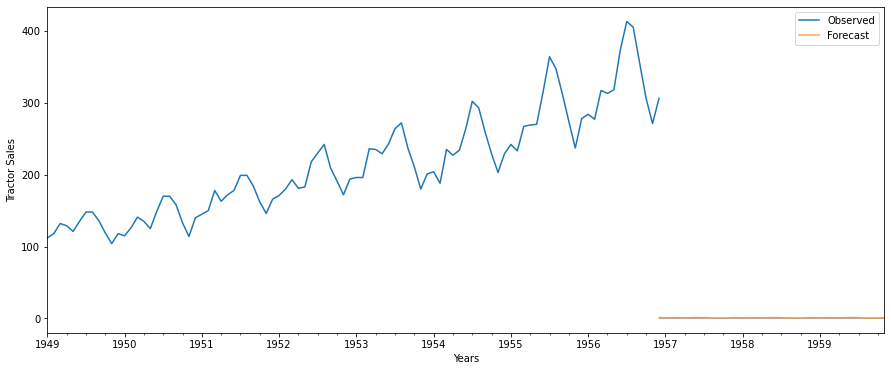

In [71]:
# plot the forecast along with the confidence band
axis = passengers_count.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

Diagnostics
1. Errors follows normality
2. Errors should not have auto correlation (ACF, no spikes beyond the limits)
3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)

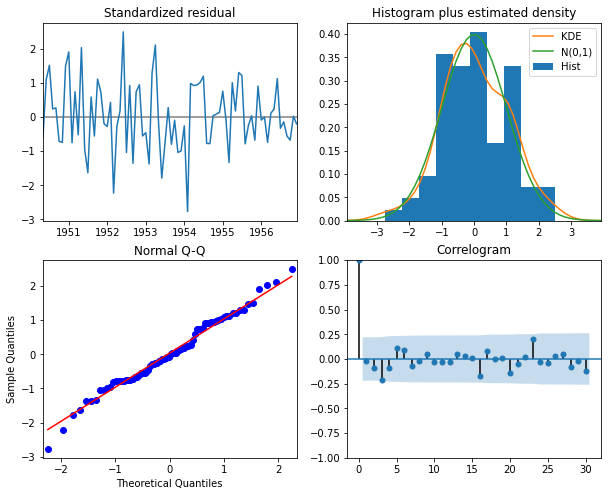

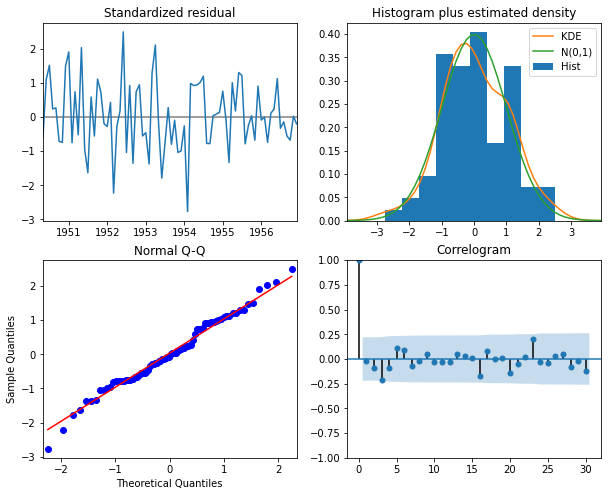

In [72]:
sarima_results.plot_diagnostics(lags=30,figsize=(10,8))